距离对比

VSG分布:
  马氏距离均值: 19.1438
  马氏距离 > 30 的样本比例: 20.60%
GAN分布:
  马氏距离均值: 40.0237
  马氏距离 > 30 的样本比例: 60.40%


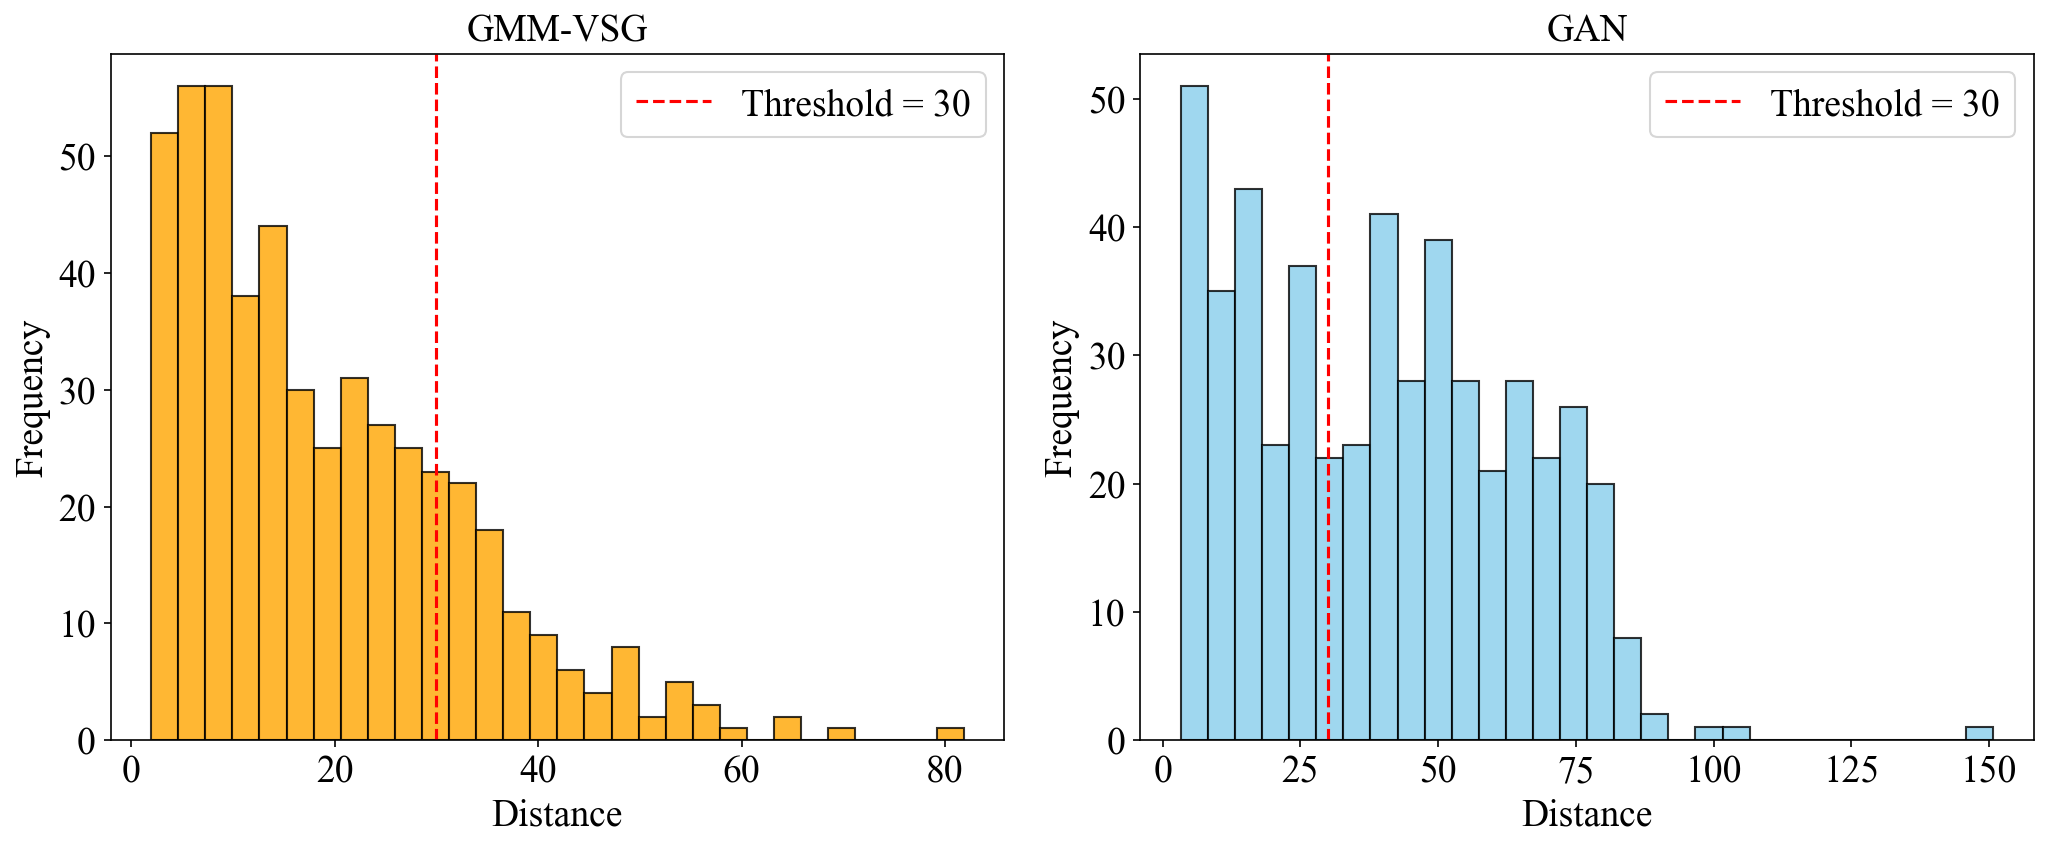

In [28]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 设置字体为 Times New Roman，并增大默认字体大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18  # 调整全局字体大小
plt.rcParams['figure.dpi'] = 150  # 提高清晰度

# 1. 读取 Excel 文件
path_real = r'C:\Users\la136\Desktop\原有分布.xlsx'
path_vsg = r'C:\Users\la136\Desktop\VSG生成分布.xlsx'
path_gan = r'C:\Users\la136\Desktop\GAN生成分布.xlsx'

df_real = pd.read_excel(path_real)
df_vsg = pd.read_excel(path_vsg)
df_gan = pd.read_excel(path_gan)

# 2. 提取特征（假设最后一列是标签）
X_real = df_real.iloc[:, :-1].values
X_vsg = df_vsg.iloc[:, :-1].values
X_gan = df_gan.iloc[:, :-1].values

# 3. 计算原始分布的均值和协方差矩阵
mean_real = np.mean(X_real, axis=0)
cov_real = np.cov(X_real, rowvar=False)
inv_cov_real = np.linalg.inv(cov_real)

# 4. 计算马氏距离
mahal_vsg = [distance.mahalanobis(sample, mean_real, inv_cov_real) for sample in X_vsg]
mahal_gan = [distance.mahalanobis(sample, mean_real, inv_cov_real) for sample in X_gan]

# 5. 打印统计信息
threshold = 30
print("VSG分布:")
print(f"  马氏距离均值: {np.mean(mahal_vsg):.4f}")
print(f"  马氏距离 > {threshold} 的样本比例: {np.mean(np.array(mahal_vsg) > threshold) * 100:.2f}%")

print("GAN分布:")
print(f"  马氏距离均值: {np.mean(mahal_gan):.4f}")
print(f"  马氏距离 > {threshold} 的样本比例: {np.mean(np.array(mahal_gan) > threshold) * 100:.2f}%")

# 6. 可视化两个分布的直方图
plt.figure(figsize=(14, 6))  # 增大整体图像尺寸

# 左图 - VSG
plt.subplot(1, 2, 1)
plt.hist(mahal_vsg, bins=30, edgecolor='black', alpha=0.8, color='orange')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Distance', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('GMM-VSG', fontsize=18)
plt.legend(fontsize=18)

# 右图 - GAN
plt.subplot(1, 2, 2)
plt.hist(mahal_gan, bins=30, edgecolor='black', alpha=0.8, color='skyblue')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Distance', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('GAN', fontsize=18)
plt.legend(fontsize=18)
# plt.savefig(r"C:\Users\la136\Desktop\mahalanobis_comparison.png", dpi=300) 
plt.tight_layout()
plt.show()


VSG

马氏距离均值: 19.7111
马氏距离 > 30 的样本比例: 21.00%


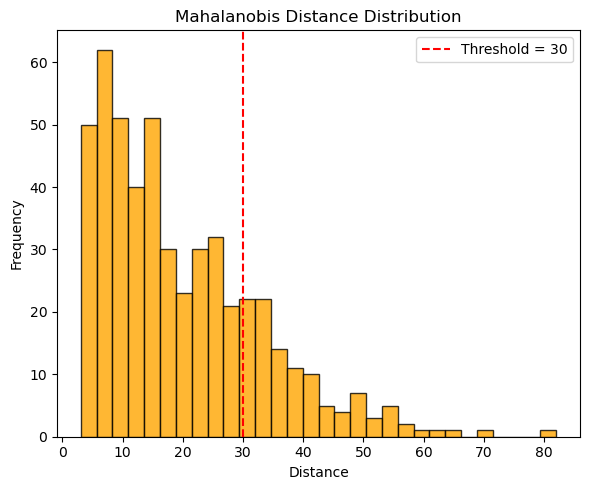

In [4]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 1. 读取 Excel 文件
path_real = r'C:\Users\la136\Desktop\原有分布.xlsx'
path_vsg = r'C:\Users\la136\Desktop\VSG生成分布.xlsx'

df_real = pd.read_excel(path_real)
df_vsg = pd.read_excel(path_vsg)

# 2. 提取特征（假设最后一列是标签）
X_real = df_real.iloc[:, :-1].values
X_vsg = df_vsg.iloc[:, :-1].values

# 3. 马氏距离计算
mean_real = np.mean(X_real, axis=0)
cov_real = np.cov(X_real, rowvar=False)
inv_cov_real = np.linalg.inv(cov_real)
mahalanobis_distances = [
    distance.mahalanobis(sample, mean_real, inv_cov_real)
    for sample in X_vsg
]

# 4. 打印统计信息
mean_mahal = np.mean(mahalanobis_distances)
threshold = 30
outlier_ratio = np.mean(np.array(mahalanobis_distances) > threshold)

print(f"马氏距离均值: {mean_mahal:.4f}")
print(f"马氏距离 > {threshold} 的样本比例: {outlier_ratio*100:.2f}%")

# 5. 可视化直方图
plt.figure(figsize=(6, 5))
plt.hist(mahalanobis_distances, bins=30, edgecolor='black', alpha=0.8, color='orange')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Mahalanobis Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()



MTD

In [21]:
from crucio import MTDF
import pandas as pd

# 原始数据（你已加载）
df = pd.read_excel(r"C:\Users\la136\Desktop\123和4.xlsx", sheet_name='1461')

# 初始化 MTDF
mtdf = MTDF(seed=42)

# 执行增强（默认生成所有）
df_augmented = mtdf.balance(df,target='label')

# 取出增强部分（新增虚拟样本）
generated = pd.merge(df_augmented, df, how='outer', indicator=True)
generated = generated[generated['_merge'] == 'left_only'].drop(columns=['_merge'])

# 只保留 500 条样本（随机抽样）
generated_500 = generated.sample(n=500, random_state=42)

# 保存为 Excel
generated_500.to_excel(r"C:\Users\la136\Desktop\MTD生成分布.xlsx", index=False)
print(f"✅ 已生成 500 条虚拟样本并保存为 MTDF_生成500样本.xlsx")


✅ 已生成 500 条虚拟样本并保存为 MTDF_生成500样本.xlsx


d:\py\Anaconda3\envs\py37\lib\site-packages\crucio\MTDF.py:115: RuntimeWarning: divide by zero encountered in log
  a = uset - skewL * np.sqrt(-2 * (variance / len(self.df[self.df[self.target] == minority_class])) * np.log(norm.cdf(a)))


马氏距离均值: 145438.4380
马氏距离 > 30 的样本比例: 100.00%


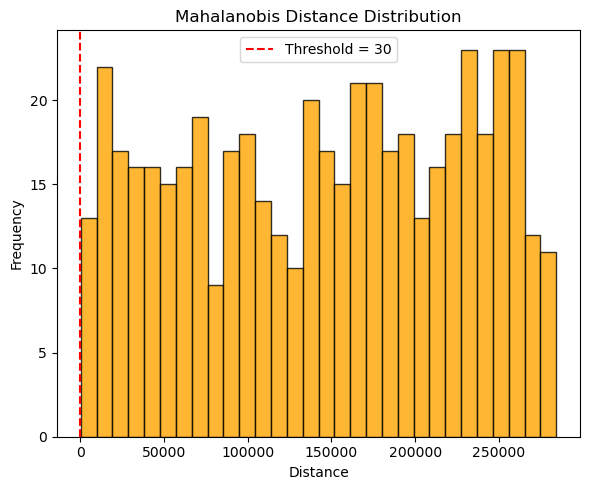

In [22]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 1. 读取 Excel 文件
path_real = r'C:\Users\la136\Desktop\原有分布.xlsx'
path_vsg = r'C:\Users\la136\Desktop\MTD生成分布.xlsx'

df_real = pd.read_excel(path_real)
df_vsg = pd.read_excel(path_vsg)

# 2. 提取特征（假设最后一列是标签）
X_real = df_real.iloc[:, :-1].values
X_vsg = df_vsg.iloc[:, :-1].values

# 3. 马氏距离计算
mean_real = np.mean(X_real, axis=0)
cov_real = np.cov(X_real, rowvar=False)
inv_cov_real = np.linalg.inv(cov_real)
mahalanobis_distances = [
    distance.mahalanobis(sample, mean_real, inv_cov_real)
    for sample in X_vsg
]

# 4. 打印统计信息
mean_mahal = np.mean(mahalanobis_distances)
threshold = 30
outlier_ratio = np.mean(np.array(mahalanobis_distances) > threshold)

print(f"马氏距离均值: {mean_mahal:.4f}")
print(f"马氏距离 > {threshold} 的样本比例: {outlier_ratio*100:.2f}%")

# 5. 可视化直方图
plt.figure(figsize=(6, 5))
plt.hist(mahalanobis_distances, bins=30, edgecolor='black', alpha=0.8, color='orange')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Mahalanobis Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


GAN

In [ ]:
import pandas as pd
from ctgan import CTGAN
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# 1. 读取原始数据
df = pd.read_excel(r"C:\Users\la136\Desktop\123和4.xlsx", sheet_name='1461')
target_column = 'label'

# 2. 选取要增强的类别样本（如正类 label=1）
pos_df = df[df[target_column] == 1]

# 3. 初始化 CTGAN 并训练
ctgan = CTGAN(epochs=100)
ctgan.fit(pos_df, discrete_columns=[target_column])

# 4. 生成指定数量的新样本
synthetic_data = ctgan.sample(n=500)

# 5. 保存生成样本
synthetic_data.to_excel(r"C:\Users\la136\Desktop\GAN生成分布.xlsx", index=False)

print("✅ 已生成并保存 500 条虚拟样本到 CTGAN_生成样本.xlsx")


d:\py\Anaconda3\envs\pytorch\lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
d:\py\Anaconda3\envs\pytorch\lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
d:\py\Anaconda3\envs\pytorch\lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
d:\py\Anaconda3\envs\pytorch\lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Pl

✅ 已生成并保存 500 条虚拟样本到 CTGAN_生成样本.xlsx


马氏距离均值: 40.0237
马氏距离 > 30 的样本比例: 60.40%


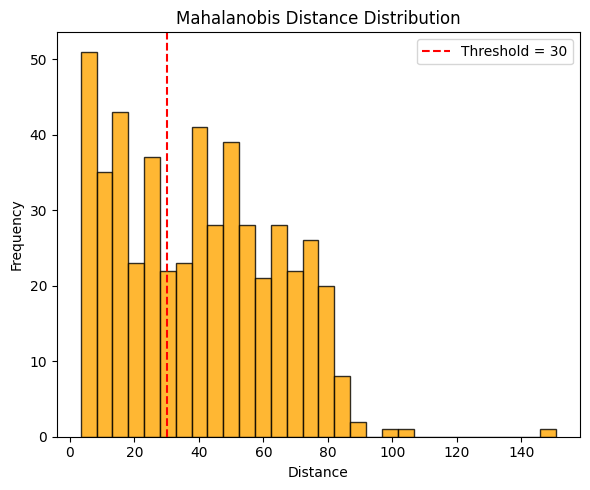

In [2]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 1. 读取 Excel 文件
path_real = r'C:\Users\la136\Desktop\原有分布.xlsx'
path_vsg = r'C:\Users\la136\Desktop\GAN生成分布.xlsx'

df_real = pd.read_excel(path_real)
df_vsg = pd.read_excel(path_vsg)

# 2. 提取特征（假设最后一列是标签）
X_real = df_real.iloc[:, :-1].values
X_vsg = df_vsg.iloc[:, :-1].values

# 3. 马氏距离计算
mean_real = np.mean(X_real, axis=0)
cov_real = np.cov(X_real, rowvar=False)
inv_cov_real = np.linalg.inv(cov_real)
mahalanobis_distances = [
    distance.mahalanobis(sample, mean_real, inv_cov_real)
    for sample in X_vsg
]

# 4. 打印统计信息
mean_mahal = np.mean(mahalanobis_distances)
threshold = 30
outlier_ratio = np.mean(np.array(mahalanobis_distances) > threshold)

print(f"马氏距离均值: {mean_mahal:.4f}")
print(f"马氏距离 > {threshold} 的样本比例: {outlier_ratio*100:.2f}%")

# 5. 可视化直方图
plt.figure(figsize=(6, 5))
plt.hist(mahalanobis_distances, bins=30, edgecolor='black', alpha=0.8, color='orange')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Mahalanobis Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

分布对比

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# 1. 加载数据
path_real = r'C:\Users\la136\Desktop\原有分布.xlsx'
path_gan = r'C:\Users\la136\Desktop\GAN生成分布.xlsx'

df_real = pd.read_excel(path_real)
df_gan = pd.read_excel(path_gan)

# 2. 提取特征（假设最后一列是 label）
X_real = df_real.iloc[:, :-1].values
X_gan = df_gan.iloc[:, :-1].values

# 3. 定义 KL散度函数（基于 KDE）
def compute_kl_divergence_kde(p_samples, q_samples, grid_size=1000):
    # 建立 KDE
    kde_p = gaussian_kde(p_samples)
    kde_q = gaussian_kde(q_samples)

    # 评估点：取两组样本最小值~最大值之间
    min_val = min(p_samples.min(), q_samples.min())
    max_val = max(p_samples.max(), q_samples.max())
    x = np.linspace(min_val, max_val, grid_size)

    p = kde_p(x)
    q = kde_q(x)

    # 避免除0/取log(0)
    epsilon = 1e-10
    kl_div = np.sum(p * np.log((p + epsilon) / (q + epsilon))) * (x[1] - x[0])  # 近似积分
    return kl_div

# 4. 遍历每个特征，计算 KL散度
kl_results = []
n_features = X_real.shape[1]
for i in range(n_features):
    real_col = X_real[:, i]
    gan_col = X_gan[:, i]
    kl = compute_kl_divergence_kde(real_col, gan_col)
    kl_results.append(kl)

# 5. 打印结果
print("\n📊 每个特征维度的 KL 散度（越小越接近）：")
for i, kl in enumerate(kl_results):
    print(f"特征 {i+1:>2}: KL散度 = {kl:.4f}")

print(f"\n✅ 平均 KL 散度: {np.mean(kl_results):.4f}")



📊 每个特征维度的 KL 散度（越小越接近）：
特征  1: KL散度 = 0.4429
特征  2: KL散度 = 0.1588
特征  3: KL散度 = 0.0325
特征  4: KL散度 = -0.0065
特征  5: KL散度 = 0.0727
特征  6: KL散度 = 0.3223
特征  7: KL散度 = 0.7174
特征  8: KL散度 = 0.2350
特征  9: KL散度 = 0.1086
特征 10: KL散度 = 0.7082
特征 11: KL散度 = 0.2156
特征 12: KL散度 = 3.9134
特征 13: KL散度 = 0.1852

✅ 平均 KL 散度: 0.5466


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# 1. 加载数据
path_real = r'C:\Users\la136\Desktop\原有分布.xlsx'
path_gan = r'C:\Users\la136\Desktop\MTD生成分布.xlsx'

df_real = pd.read_excel(path_real)
df_gan = pd.read_excel(path_gan)

# 2. 提取特征（假设最后一列是 label）
X_real = df_real.iloc[:, :-1].values
X_gan = df_gan.iloc[:, :-1].values

# 3. 定义 KL散度函数（基于 KDE）
def compute_kl_divergence_kde(p_samples, q_samples, grid_size=1000):
    # 建立 KDE
    kde_p = gaussian_kde(p_samples)
    kde_q = gaussian_kde(q_samples)

    # 评估点：取两组样本最小值~最大值之间
    min_val = min(p_samples.min(), q_samples.min())
    max_val = max(p_samples.max(), q_samples.max())
    x = np.linspace(min_val, max_val, grid_size)

    p = kde_p(x)
    q = kde_q(x)

    # 避免除0/取log(0)
    epsilon = 1e-10
    kl_div = np.sum(p * np.log((p + epsilon) / (q + epsilon))) * (x[1] - x[0])  # 近似积分
    return kl_div

# 4. 遍历每个特征，计算 KL散度
kl_results = []
n_features = X_real.shape[1]
for i in range(n_features):
    real_col = X_real[:, i]
    gan_col = X_gan[:, i]
    kl = compute_kl_divergence_kde(real_col, gan_col)
    kl_results.append(kl)

# 5. 打印结果
print("\n📊 每个特征维度的 KL 散度（越小越接近）：")
for i, kl in enumerate(kl_results):
    print(f"特征 {i+1:>2}: KL散度 = {kl:.4f}")

print(f"\n✅ 平均 KL 散度: {np.mean(kl_results):.4f}")


📊 每个特征维度的 KL 散度（越小越接近）：
特征  1: KL散度 = 18.9621
特征  2: KL散度 = 20.1896
特征  3: KL散度 = 14.6942
特征  4: KL散度 = 0.2001
特征  5: KL散度 = 2.3337
特征  6: KL散度 = 19.5793
特征  7: KL散度 = 11.5196
特征  8: KL散度 = 0.4914
特征  9: KL散度 = 6.1098
特征 10: KL散度 = 21.0751
特征 11: KL散度 = 18.1820
特征 12: KL散度 = 17.9108
特征 13: KL散度 = 23.4531

✅ 平均 KL 散度: 13.4385


In [17]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# 1. 加载数据
path_real = r'C:\Users\la136\Desktop\原有分布.xlsx'
path_gan = r'C:\Users\la136\Desktop\VSG生成分布.xlsx'

df_real = pd.read_excel(path_real)
df_gan = pd.read_excel(path_gan)

# 2. 提取特征（假设最后一列是 label）
X_real = df_real.iloc[:, :-1].values
X_gan = df_gan.iloc[:, :-1].values

# 3. 定义 KL散度函数（基于 KDE）
def compute_kl_divergence_kde(p_samples, q_samples, grid_size=1000):
    # 建立 KDE
    kde_p = gaussian_kde(p_samples)
    kde_q = gaussian_kde(q_samples)

    # 评估点：取两组样本最小值~最大值之间
    min_val = min(p_samples.min(), q_samples.min())
    max_val = max(p_samples.max(), q_samples.max())
    x = np.linspace(min_val, max_val, grid_size)

    p = kde_p(x)
    q = kde_q(x)

    # 避免除0/取log(0)
    epsilon = 1e-10
    kl_div = np.sum(p * np.log((p + epsilon) / (q + epsilon))) * (x[1] - x[0])  # 近似积分
    return kl_div

# 4. 遍历每个特征，计算 KL散度
kl_results = []
n_features = X_real.shape[1]
for i in range(n_features):
    real_col = X_real[:, i]
    gan_col = X_gan[:, i]
    kl = compute_kl_divergence_kde(real_col, gan_col)
    kl_results.append(kl)

# 5. 打印结果
print("\n📊 每个特征维度的 KL 散度（越小越接近）：")
for i, kl in enumerate(kl_results):
    print(f"特征 {i+1:>2}: KL散度 = {kl:.4f}")

print(f"\n✅ 平均 KL 散度: {np.mean(kl_results):.4f}")


📊 每个特征维度的 KL 散度（越小越接近）：
特征  1: KL散度 = 0.2561
特征  2: KL散度 = 0.0915
特征  3: KL散度 = 0.1098
特征  4: KL散度 = 0.0132
特征  5: KL散度 = 0.2702
特征  6: KL散度 = 0.1050
特征  7: KL散度 = 0.5105
特征  8: KL散度 = 0.0328
特征  9: KL散度 = 0.0203
特征 10: KL散度 = 0.1303
特征 11: KL散度 = 0.1716
特征 12: KL散度 = 3.0893
特征 13: KL散度 = 0.3862

✅ 平均 KL 散度: 0.3990


In [27]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon
from sklearn.metrics.pairwise import rbf_kernel
from scipy.stats import gaussian_kde

# ==== 1. 加载数据 ====
path_real = r'C:\Users\la136\Desktop\原有分布.xlsx'
path_gen = r'C:\Users\la136\Desktop\MTD生成分布.xlsx'

df_real = pd.read_excel(path_real)
df_gen = pd.read_excel(path_gen)

# ==== 2. 提取特征（假设最后一列是 label） ====
X_real = df_real.iloc[:, :-1].values
X_gen = df_gen.iloc[:, :-1].values

# ==== 3. JS散度计算函数（单维，基于KDE估计PDF） ====
def compute_js_divergence_1d(p_samples, q_samples, bins=100):
    min_val = min(p_samples.min(), q_samples.min())
    max_val = max(p_samples.max(), q_samples.max())
    hist_range = (min_val, max_val)
    
    p_hist, _ = np.histogram(p_samples, bins=bins, range=hist_range, density=True)
    q_hist, _ = np.histogram(q_samples, bins=bins, range=hist_range, density=True)
    
    # 避免0除法
    p_hist += 1e-10
    q_hist += 1e-10
    
    return jensenshannon(p_hist, q_hist)

# ==== 5. JS散度逐维计算 ====
js_divergences = []
for i in range(X_real.shape[1]):
    js = compute_js_divergence_1d(X_real[:, i], X_gen[:, i])
    js_divergences.append(js)

# ==== 6. 打印结果 ====
print("📊 每个特征维度的 JS散度（越小越接近）：")
for i, js in enumerate(js_divergences):
    print(f"特征 {i+1:>2}: JS散度 = {js:.4f}")
print(f"\n✅ 平均 JS散度：{np.mean(js_divergences):.4f}")


📊 每个特征维度的 JS散度（越小越接近）：
特征  1: JS散度 = 0.8326
特征  2: JS散度 = 0.8326
特征  3: JS散度 = 0.8326
特征  4: JS散度 = 0.2944
特征  5: JS散度 = 0.8098
特征  6: JS散度 = 0.8248
特征  7: JS散度 = 0.8326
特征  8: JS散度 = 0.5368
特征  9: JS散度 = 0.8282
特征 10: JS散度 = 0.8039
特征 11: JS散度 = 0.8326
特征 12: JS散度 = 0.8326
特征 13: JS散度 = 0.8241

✅ 平均 JS散度：0.7629
